# Ordered ordinal encoding (target guided encoding)

**Definition**

  * Categories are replaced by integers from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category

  * Mean Red = (1+0)/2 = 0.5, Yellow = (1+1)/2=1, Green=0. --> order: Yellow (1) -> Red (2) -> Green (3)  

    ![](images/ordered_ordinal_encoding_example.png)

**Advantages**

  * Straightforward to implement 
  * Does not expand the feature space 
  * Creates monotonic relationship between categories and target 

**Limitations**

  * May lead to over-fitting
  * Difficult to implement together with cross-validation with current libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Load Data

In [2]:
df = pd.read_csv('../data/house_price/train.csv', usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

In [3]:
df

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
0,CollgCr,VinylSd,VinylSd,208500
1,Veenker,MetalSd,MetalSd,181500
2,CollgCr,VinylSd,VinylSd,223500
3,Crawfor,Wd Sdng,Wd Shng,140000
4,NoRidge,VinylSd,VinylSd,250000
...,...,...,...,...
1455,Gilbert,VinylSd,VinylSd,175000
1456,NWAmes,Plywood,Plywood,210000
1457,Crawfor,CemntBd,CmentBd,266500
1458,NAmes,MetalSd,MetalSd,142125


In [4]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [5]:
df['Exterior1st'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [6]:
df['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Shng', 'HdBoard', 'Plywood', 'Wd Sdng',
       'CmentBd', 'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc',
       'AsphShn', 'Stone', 'Other', 'CBlock'], dtype=object)

# Split data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']], # keep the target variable
    df['SalePrice'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((1022, 4), (438, 4))

# Explore original relationship (not monotonic)

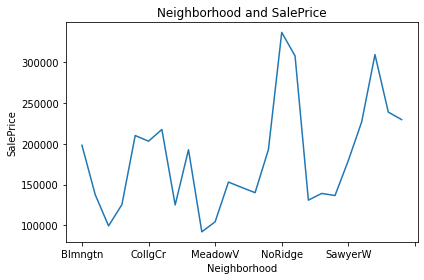

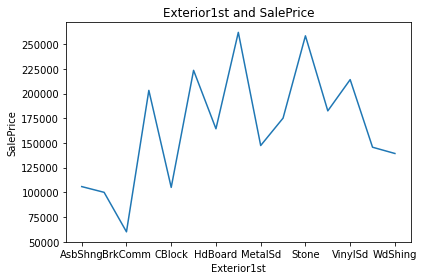

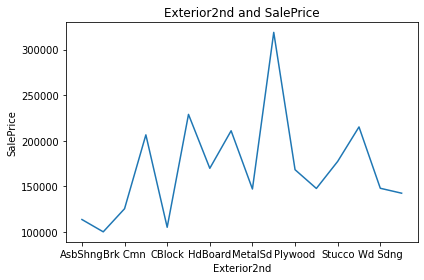

In [8]:
cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

for col in cols:
    fig, ax = plt.subplots()
    X_train.groupby([col])['SalePrice'].mean().plot()
    plt.title(f'{col} and SalePrice')
    plt.ylabel('SalePrice')
    plt.tight_layout()
    plt.show()

# Ordered ordinal encoding

In [9]:
X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values()

Neighborhood
IDOTRR      92174.166667
BrDale      99440.000000
MeadowV    104441.666667
Edwards    125082.676056
BrkSide    125438.414634
OldTown    130958.328767
Sawyer     136596.442623
Blueste    137500.000000
SWISU      139154.666667
NPkVill    140107.142857
NAmes      146435.264901
Mitchel    153070.444444
SawyerW    179463.088889
Gilbert    192662.290909
NWAmes     192788.235294
Blmngtn    198164.500000
CollgCr    203086.371429
ClearCr    210034.666667
Crawfor    217453.914286
Somerst    226644.196429
Veenker    229500.000000
Timber     238700.100000
NridgHt    307418.137255
StoneBr    309105.937500
NoRidge    336264.666667
Name: SalePrice, dtype: float64

In [10]:
ordered_labels = X_train.groupby(['Neighborhood'])['SalePrice'].mean().sort_values().index

ordered_labels

Index(['IDOTRR', 'BrDale', 'MeadowV', 'Edwards', 'BrkSide', 'OldTown',
       'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes', 'Mitchel', 'SawyerW',
       'Gilbert', 'NWAmes', 'Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor',
       'Somerst', 'Veenker', 'Timber', 'NridgHt', 'StoneBr', 'NoRidge'],
      dtype='object', name='Neighborhood')

In [11]:
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels)}

In [12]:
ordinal_mapping

{'IDOTRR': 0,
 'BrDale': 1,
 'MeadowV': 2,
 'Edwards': 3,
 'BrkSide': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'Blueste': 7,
 'SWISU': 8,
 'NPkVill': 9,
 'NAmes': 10,
 'Mitchel': 11,
 'SawyerW': 12,
 'Gilbert': 13,
 'NWAmes': 14,
 'Blmngtn': 15,
 'CollgCr': 16,
 'ClearCr': 17,
 'Crawfor': 18,
 'Somerst': 19,
 'Veenker': 20,
 'Timber': 21,
 'NridgHt': 22,
 'StoneBr': 23,
 'NoRidge': 24}

# Apply mapping

In [13]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,CollgCr,VinylSd,VinylSd,219500
682,ClearCr,Wd Sdng,Wd Sdng,173000
960,BrkSide,Wd Sdng,Plywood,116500
1384,Edwards,WdShing,Wd Shng,105000
1100,SWISU,Wd Sdng,Wd Sdng,60000


In [14]:
X_train['Neighborhood'] = X_train['Neighborhood'].map(ordinal_mapping)

In [15]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,16,VinylSd,VinylSd,219500
682,17,Wd Sdng,Wd Sdng,173000
960,4,Wd Sdng,Plywood,116500
1384,3,WdShing,Wd Shng,105000
1100,8,Wd Sdng,Wd Sdng,60000


# Encoding and mapping for multiple columns

In [16]:
# Get the data again
X_train, X_test, y_train, y_test = train_test_split(
    df[['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice']], # keep the target variable
    df['SalePrice'],
    test_size=0.3,
    random_state=0
)

X_train.shape, X_test.shape

((1022, 4), (438, 4))

In [17]:
d = {} 
cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']
for col in cols:
    ordered_labels = X_train.groupby([col])['SalePrice'].mean().sort_values().index
    ordinal_mapping = {k: i for i, k in enumerate(ordered_labels)}
    d[col] = ordinal_mapping

In [18]:
d

{'Neighborhood': {'IDOTRR': 0,
  'BrDale': 1,
  'MeadowV': 2,
  'Edwards': 3,
  'BrkSide': 4,
  'OldTown': 5,
  'Sawyer': 6,
  'Blueste': 7,
  'SWISU': 8,
  'NPkVill': 9,
  'NAmes': 10,
  'Mitchel': 11,
  'SawyerW': 12,
  'Gilbert': 13,
  'NWAmes': 14,
  'Blmngtn': 15,
  'CollgCr': 16,
  'ClearCr': 17,
  'Crawfor': 18,
  'Somerst': 19,
  'Veenker': 20,
  'Timber': 21,
  'NridgHt': 22,
  'StoneBr': 23,
  'NoRidge': 24},
 'Exterior1st': {'BrkComm': 0,
  'AsphShn': 1,
  'CBlock': 2,
  'AsbShng': 3,
  'WdShing': 4,
  'Wd Sdng': 5,
  'MetalSd': 6,
  'HdBoard': 7,
  'Plywood': 8,
  'Stucco': 9,
  'BrkFace': 10,
  'VinylSd': 11,
  'CemntBd': 12,
  'Stone': 13,
  'ImStucc': 14},
 'Exterior2nd': {'AsphShn': 0,
  'CBlock': 1,
  'AsbShng': 2,
  'Brk Cmn': 3,
  'Wd Shng': 4,
  'MetalSd': 5,
  'Stone': 6,
  'Wd Sdng': 7,
  'Plywood': 8,
  'HdBoard': 9,
  'Stucco': 10,
  'BrkFace': 11,
  'ImStucc': 12,
  'VinylSd': 13,
  'CmentBd': 14,
  'Other': 15}}

In [19]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,CollgCr,VinylSd,VinylSd,219500
682,ClearCr,Wd Sdng,Wd Sdng,173000
960,BrkSide,Wd Sdng,Plywood,116500
1384,Edwards,WdShing,Wd Shng,105000
1100,SWISU,Wd Sdng,Wd Sdng,60000


In [20]:
for col in cols:
    X_train[col] = X_train[col].map(d[col])

In [21]:
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd,SalePrice
64,16,11,13,219500
682,17,5,7,173000
960,4,5,8,116500
1384,3,4,4,105000
1100,8,5,7,60000
